## Data Initialization

In [1]:
from torchvision.datasets import Cityscapes
import torchvision.transforms as T
from PIL import Image
from roboflow import Roboflow
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
import numpy as np
import cv2
import json
import glob
import tqdm

In [4]:
# downloading dataset in yolo format
rf = Roboflow(api_key="TbG4o6EFfJ15o6vHSJi8")
project = rf.workspace("eastsky").project("bdd100k-e3s18")
version = project.version(1)
dataset = version.download("yolov11")                

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to bdd100k--1 in yolov11:: 100%|██████████| 19606/19606 [00:41<00:00, 471.41it/s] 


In [5]:
# downloading dataset in coco format
rf = Roboflow(api_key="TbG4o6EFfJ15o6vHSJi8")
project = rf.workspace("eastsky").project("bdd100k-e3s18")
version = project.version(1)
dataset = version.download("coco")

loading Roboflow workspace...
loading Roboflow project...


In [13]:
dspath = dataset.location
print(dspath)

D:\ery\School\Jupyter Notebooks\bdd100k--1


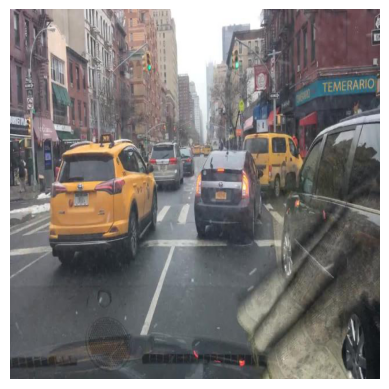

In [23]:
# loading some images
rand_img = mpimg.imread('bdd100k--1/test/images/b1d0a191-2ed2269e_jpg.rf.bd35938271d9e43b0ea9b3e3fa14c173.jpg')
plt.imshow(rand_img)
plt.axis('off')
plt.show()

## 3 model object detection benchmark

### YOLO 11

In [4]:
yolo_model = YOLO('yolo11n.pt')
yolo_model.train(data='bdd100k--1/data.yaml', epochs = 20, imgsz=640, batch=16)

New https://pypi.org/project/ultralytics/8.3.109 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.107  Python-3.10.13 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 2060 SUPER, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=bdd100k--1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train14, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, sa

train: Scanning D:\ery\School\Jupyter Notebooks\bdd100k--1\train\labels.cache... 6857 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6857/6857 [00:00<?, ?it/s]
val: Scanning D:\ery\School\Jupyter Notebooks\bdd100k--1\valid\labels.cache... 1960 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1960/1960 [00:00<?, ?it/s]


Plotting labels to runs\detect\train14\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train14
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      3.06G      1.587      1.892      1.178         79        640: 100%|██████████| 429/429 [01:51<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:21<00:00,  2.82it/s]


                   all       1960      24550      0.685      0.193      0.193      0.109

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      3.06G      1.505      1.294      1.158        173        640: 100%|██████████| 429/429 [01:36<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:18<00:00,  3.28it/s]


                   all       1960      24550      0.386       0.24      0.199      0.107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      3.06G      1.481      1.186       1.15        180        640: 100%|██████████| 429/429 [01:32<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:18<00:00,  3.35it/s]


                   all       1960      24550      0.478       0.22      0.228      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      3.06G      1.475      1.138      1.147        247        640: 100%|██████████| 429/429 [01:30<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.49it/s]


                   all       1960      24550      0.515      0.243       0.24      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      3.06G      1.447      1.078      1.132        169        640: 100%|██████████| 429/429 [01:31<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:18<00:00,  3.37it/s]


                   all       1960      24550       0.47      0.253       0.26      0.143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      3.06G      1.425      1.038       1.12        157        640: 100%|██████████| 429/429 [01:30<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.49it/s]


                   all       1960      24550      0.347      0.306      0.278      0.155

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      3.06G       1.41      1.018      1.117        174        640: 100%|██████████| 429/429 [01:29<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:18<00:00,  3.38it/s]


                   all       1960      24550      0.392      0.293      0.274       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      3.06G        1.4      1.003       1.11        152        640: 100%|██████████| 429/429 [01:30<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.52it/s]


                   all       1960      24550      0.397      0.326      0.308       0.17

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      3.06G      1.375     0.9746      1.102        290        640: 100%|██████████| 429/429 [01:31<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.45it/s]


                   all       1960      24550      0.399      0.328      0.307      0.174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      3.06G      1.367     0.9569      1.097        192        640: 100%|██████████| 429/429 [01:29<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.46it/s]


                   all       1960      24550      0.405      0.351       0.33      0.185
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      3.06G      1.381     0.9142      1.092         96        640: 100%|██████████| 429/429 [01:24<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.49it/s]


                   all       1960      24550      0.453      0.333       0.34      0.193

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      3.06G      1.373     0.8985      1.089        117        640: 100%|██████████| 429/429 [01:23<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.57it/s]


                   all       1960      24550      0.444      0.356      0.351      0.194

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      3.06G      1.361     0.8829      1.082         80        640: 100%|██████████| 429/429 [01:23<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.51it/s]


                   all       1960      24550      0.461       0.35      0.354      0.198

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      3.06G      1.348     0.8663      1.075         84        640: 100%|██████████| 429/429 [01:23<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.54it/s]


                   all       1960      24550       0.55      0.349      0.375       0.21

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      3.06G      1.338     0.8562      1.072         95        640: 100%|██████████| 429/429 [01:24<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.59it/s]


                   all       1960      24550      0.485      0.364       0.37      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      3.06G      1.334      0.844      1.067         77        640: 100%|██████████| 429/429 [01:23<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.57it/s]


                   all       1960      24550      0.572      0.347      0.387      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      3.06G       1.32     0.8286      1.062        106        640: 100%|██████████| 429/429 [01:23<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.52it/s]


                   all       1960      24550      0.585      0.341      0.382      0.221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      3.06G      1.312      0.818      1.058        125        640: 100%|██████████| 429/429 [01:24<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.57it/s]


                   all       1960      24550      0.516      0.365      0.384      0.225

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      3.06G      1.304     0.8085      1.054        123        640: 100%|██████████| 429/429 [01:24<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.54it/s]


                   all       1960      24550       0.57      0.344      0.388      0.228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      3.06G      1.294     0.7965      1.049        127        640: 100%|██████████| 429/429 [01:24<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.53it/s]


                   all       1960      24550      0.568      0.358      0.398      0.233

20 epochs completed in 0.629 hours.
Optimizer stripped from runs\detect\train14\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\train14\weights\best.pt, 5.5MB

Validating runs\detect\train14\weights\best.pt...
Ultralytics 8.3.107  Python-3.10.13 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 2060 SUPER, 8192MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:24<00:00,  2.52it/s]


                   all       1960      24550      0.553      0.362      0.398      0.233
                  bike        121        221      0.473      0.294      0.289      0.136
                   bus        227        309      0.565      0.391      0.437      0.318
                   car       1956      20327      0.704      0.659      0.719       0.44
                 motor         67         90       0.63      0.151      0.223      0.106
                person        639       2626      0.563      0.428      0.462      0.215
                 rider        104        133      0.398      0.158      0.182     0.0829
                 truck        526        844      0.539      0.454      0.472      0.332
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs\detect\train14


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002127C82CBB0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047


image 1/1 D:\ery\School\Jupyter Notebooks\street-traffic-new-york-typical-street-view-manhattan-manhattan-new-york-april-92272598.webp: 384x640 11 cars, 6 persons, 69.1ms
Speed: 3.3ms preprocess, 69.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


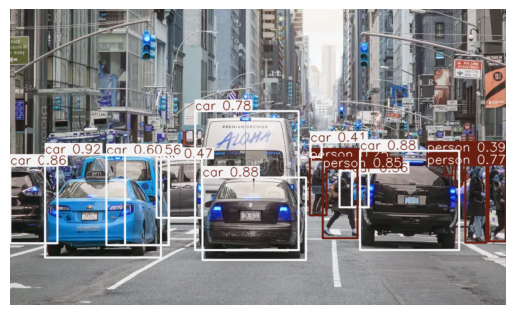

In [10]:
pred_test = yolo_model('street-traffic-new-york-typical-street-view-manhattan-manhattan-new-york-april-92272598.webp')
plt.imshow(pred_test[0].plot())
plt.axis('off')
plt.show()

In [11]:
# saving the model in onnx
yolo_model.export(format='onnx')

Ultralytics 8.3.107  Python-3.10.13 torch-2.5.1 CPU (AMD Ryzen 5 2600 Six-Core Processor)

PyTorch: starting from 'runs\detect\train14\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 11, 8400) (5.2 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.50...
ONNX: export success  6.0s, saved as 'runs\detect\train14\weights\best.onnx' (10.1 MB)

Export complete (7.0s)
Results saved to D:\ery\School\Jupyter Notebooks\runs\detect\train14\weights
Predict:         yolo predict task=detect model=runs\detect\train14\weights\best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs\detect\train14\weights\best.onnx imgsz=640 data=bdd100k--1/data.yaml  
Visualize:       https://netron.app


'runs\\detect\\train14\\weights\\best.onnx'

In [12]:
dataset.location

'D:\\ery\\School\\Jupyter Notebooks\\bdd100k--1'

### YOLOv8

In [4]:
yolov8_model = YOLO('yolov8n.yaml')
yolov8_model.train(data='bdd100k--1/data.yaml', epochs=50, imgsz=640, batch=16)

New https://pypi.org/project/ultralytics/8.3.109 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.107  Python-3.10.13 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 2060 SUPER, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=bdd100k--1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train18, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, 

train: Scanning D:\ery\School\Jupyter Notebooks\bdd100k--1\train\labels.cache... 6857 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6857/6857 [00:00<?, ?it/s]
val: Scanning D:\ery\School\Jupyter Notebooks\bdd100k--1\valid\labels.cache... 1960 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1960/1960 [00:00<?, ?it/s]


Plotting labels to runs\detect\train18\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train18
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.83G       3.63      3.819      3.478         79        640: 100%|██████████| 429/429 [02:16<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:21<00:00,  2.91it/s]


                   all       1960      24550      0.879     0.0184     0.0115    0.00369

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.85G      2.707      2.414      2.143        173        640: 100%|██████████| 429/429 [01:24<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:19<00:00,  3.22it/s]


                   all       1960      24550      0.629     0.0449     0.0498     0.0208

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.85G      2.248      1.918      1.738        180        640: 100%|██████████| 429/429 [01:22<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:19<00:00,  3.25it/s]


                   all       1960      24550      0.546     0.0916     0.0745     0.0343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.85G      2.067      1.719      1.602        247        640: 100%|██████████| 429/429 [01:20<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:19<00:00,  3.21it/s]


                   all       1960      24550      0.577      0.124      0.103     0.0503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.85G      1.946      1.568       1.52        169        640: 100%|██████████| 429/429 [01:19<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:18<00:00,  3.27it/s]


                   all       1960      24550      0.468      0.141      0.124     0.0608

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.85G      1.858       1.46       1.46        157        640: 100%|██████████| 429/429 [01:20<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:19<00:00,  3.14it/s]


                   all       1960      24550      0.463      0.149      0.135     0.0681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.85G        1.8      1.409      1.427        174        640: 100%|██████████| 429/429 [01:22<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:18<00:00,  3.27it/s]


                   all       1960      24550      0.482      0.165      0.146     0.0723

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.85G      1.745      1.351      1.387        152        640: 100%|██████████| 429/429 [01:21<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:18<00:00,  3.28it/s]


                   all       1960      24550      0.376      0.197      0.158      0.081

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.85G      1.698      1.297      1.362        290        640: 100%|██████████| 429/429 [01:19<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:18<00:00,  3.31it/s]


                   all       1960      24550      0.528      0.184      0.168     0.0866

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.85G      1.663      1.261      1.338        192        640: 100%|██████████| 429/429 [01:23<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:18<00:00,  3.34it/s]


                   all       1960      24550      0.336      0.219      0.178      0.091

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.85G      1.651      1.242      1.325        173        640: 100%|██████████| 429/429 [01:18<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.45it/s]


                   all       1960      24550      0.545      0.195       0.18     0.0942

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.85G      1.616        1.2      1.304        229        640: 100%|██████████| 429/429 [01:18<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.51it/s]


                   all       1960      24550      0.593      0.187      0.191     0.0989

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.85G       1.61      1.187      1.299        167        640: 100%|██████████| 429/429 [01:17<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.48it/s]


                   all       1960      24550      0.454      0.213      0.196      0.102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.85G      1.584      1.172      1.287        162        640: 100%|██████████| 429/429 [01:17<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.47it/s]


                   all       1960      24550      0.377      0.226      0.197      0.103

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.85G      1.582      1.169      1.278        118        640: 100%|██████████| 429/429 [01:17<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.47it/s]


                   all       1960      24550      0.396      0.219      0.208      0.107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.85G      1.574      1.148      1.265        174        640: 100%|██████████| 429/429 [01:17<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.53it/s]


                   all       1960      24550        0.3      0.222      0.205      0.108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.85G      1.557      1.128      1.255         97        640: 100%|██████████| 429/429 [01:17<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.47it/s]


                   all       1960      24550      0.313      0.227      0.211      0.112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.85G      1.543      1.117      1.246        188        640: 100%|██████████| 429/429 [01:17<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.51it/s]


                   all       1960      24550      0.337      0.237      0.215      0.116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.85G      1.545      1.115      1.241        161        640: 100%|██████████| 429/429 [01:17<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.53it/s]


                   all       1960      24550      0.337      0.257      0.214      0.116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.85G      1.533      1.099      1.235        115        640: 100%|██████████| 429/429 [01:17<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.49it/s]


                   all       1960      24550      0.363      0.228      0.218      0.117

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.85G      1.521      1.098      1.235        152        640: 100%|██████████| 429/429 [01:17<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:18<00:00,  3.42it/s]


                   all       1960      24550      0.293       0.28      0.226       0.12

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.85G      1.512      1.079      1.223        136        640: 100%|██████████| 429/429 [01:17<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.56it/s]


                   all       1960      24550      0.315      0.259      0.224       0.12

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.85G      1.495      1.066      1.212        196        640: 100%|██████████| 429/429 [01:17<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.54it/s]


                   all       1960      24550      0.348      0.263      0.234      0.125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.85G      1.497      1.067      1.215        190        640: 100%|██████████| 429/429 [01:17<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.57it/s]


                   all       1960      24550       0.32      0.279      0.233      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.85G      1.489      1.057      1.207        251        640: 100%|██████████| 429/429 [01:16<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.53it/s]


                   all       1960      24550      0.335      0.285      0.236      0.126

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.85G      1.484      1.052      1.203        191        640: 100%|██████████| 429/429 [01:17<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.50it/s]


                   all       1960      24550      0.345      0.268      0.239      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.85G      1.487      1.047      1.201        137        640: 100%|██████████| 429/429 [01:17<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.53it/s]


                   all       1960      24550      0.373      0.298       0.25      0.134

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.85G      1.469      1.038      1.197        162        640: 100%|██████████| 429/429 [01:18<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.59it/s]


                   all       1960      24550      0.382      0.288      0.248      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.85G      1.459      1.026      1.192        192        640: 100%|██████████| 429/429 [01:17<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.58it/s]


                   all       1960      24550      0.359      0.291      0.251      0.138

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.85G      1.458       1.02      1.187        115        640: 100%|██████████| 429/429 [01:17<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.53it/s]


                   all       1960      24550      0.355      0.285      0.258      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.85G      1.457      1.019      1.187        169        640: 100%|██████████| 429/429 [01:17<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.54it/s]


                   all       1960      24550      0.347      0.299      0.253      0.135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.85G      1.446      1.011      1.181        186        640: 100%|██████████| 429/429 [01:17<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.55it/s]


                   all       1960      24550      0.376      0.289      0.261      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.85G      1.442      1.005      1.174        142        640: 100%|██████████| 429/429 [01:17<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.58it/s]


                   all       1960      24550      0.383      0.306      0.267      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.85G      1.442      1.007       1.18        160        640: 100%|██████████| 429/429 [01:17<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.55it/s]


                   all       1960      24550      0.352      0.311      0.266      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.85G      1.433     0.9914       1.17        196        640: 100%|██████████| 429/429 [01:17<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.58it/s]


                   all       1960      24550      0.365      0.296      0.266      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.85G      1.425     0.9922      1.171         80        640: 100%|██████████| 429/429 [01:17<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.57it/s]


                   all       1960      24550      0.385      0.306      0.273      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.85G       1.42     0.9817      1.167        152        640: 100%|██████████| 429/429 [01:17<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.62it/s]


                   all       1960      24550      0.363      0.318      0.276      0.149

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.85G       1.42     0.9774      1.164        148        640: 100%|██████████| 429/429 [01:17<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.60it/s]


                   all       1960      24550      0.393      0.294      0.271      0.149

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.85G      1.414     0.9732      1.162        214        640: 100%|██████████| 429/429 [01:17<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.58it/s]


                   all       1960      24550      0.378      0.299      0.271      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.85G      1.416     0.9698      1.162        133        640: 100%|██████████| 429/429 [01:17<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.60it/s]


                   all       1960      24550      0.367      0.319      0.278       0.15
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.85G      1.407     0.9134      1.152         75        640: 100%|██████████| 429/429 [01:12<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.54it/s]


                   all       1960      24550      0.367      0.323      0.282      0.153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.85G      1.401     0.9022      1.145        101        640: 100%|██████████| 429/429 [01:11<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.51it/s]


                   all       1960      24550      0.371      0.323      0.285      0.157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.85G      1.398     0.8976      1.145        126        640: 100%|██████████| 429/429 [01:12<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.56it/s]


                   all       1960      24550      0.411      0.305       0.29       0.16

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.85G      1.396     0.8954      1.143        115        640: 100%|██████████| 429/429 [01:11<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.58it/s]


                   all       1960      24550      0.379      0.328      0.287      0.157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.85G      1.394     0.8929       1.14        101        640: 100%|██████████| 429/429 [01:11<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.61it/s]


                   all       1960      24550      0.373      0.326       0.29      0.159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.85G      1.385     0.8846      1.139        101        640: 100%|██████████| 429/429 [01:11<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.53it/s]


                   all       1960      24550      0.376      0.329      0.292      0.159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.85G      1.382       0.88      1.137        100        640: 100%|██████████| 429/429 [01:11<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.61it/s]


                   all       1960      24550      0.388      0.313      0.291      0.159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.85G       1.38     0.8775      1.134         94        640: 100%|██████████| 429/429 [01:12<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.61it/s]


                   all       1960      24550      0.383      0.333      0.295      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.85G      1.378     0.8749      1.135        102        640: 100%|██████████| 429/429 [01:11<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.55it/s]


                   all       1960      24550      0.372      0.334      0.295      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.85G      1.373     0.8701      1.132         90        640: 100%|██████████| 429/429 [01:11<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:17<00:00,  3.53it/s]


                   all       1960      24550      0.367      0.339      0.295      0.161

50 epochs completed in 1.381 hours.
Optimizer stripped from runs\detect\train18\weights\last.pt, 6.3MB
Optimizer stripped from runs\detect\train18\weights\best.pt, 6.3MB

Validating runs\detect\train18\weights\best.pt...
Ultralytics 8.3.107  Python-3.10.13 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 2060 SUPER, 8192MiB)
YOLOv8n summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:23<00:00,  2.59it/s]


                   all       1960      24550      0.367      0.337      0.295      0.161
                  bike        121        221      0.335      0.167      0.146     0.0526
                   bus        227        309      0.297      0.385      0.233       0.16
                   car       1956      20327      0.555      0.681      0.685      0.412
                 motor         67         90      0.332      0.132       0.13     0.0543
                person        639       2626      0.353      0.407      0.352      0.148
                 rider        104        133      0.289      0.138      0.129      0.046
                 truck        526        844      0.407      0.451      0.392      0.257
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs\detect\train18


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001EA09B67970>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047


image 1/1 D:\ery\School\Jupyter Notebooks\street-traffic-new-york-typical-street-view-manhattan-manhattan-new-york-april-92272598.webp: 384x640 7 cars, 1 person, 176.6ms
Speed: 10.5ms preprocess, 176.6ms inference, 30.6ms postprocess per image at shape (1, 3, 384, 640)


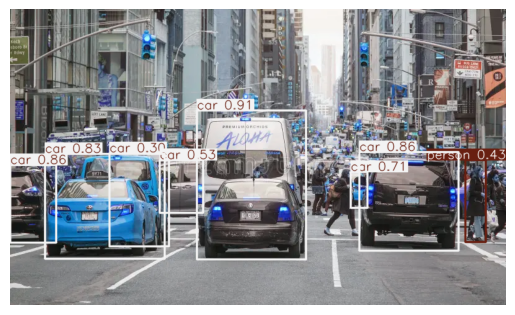

In [6]:
predv8_test = yolov8_model('street-traffic-new-york-typical-street-view-manhattan-manhattan-new-york-april-92272598.webp')
plt.imshow(predv8_test[0].plot())
plt.axis('off')
plt.show()

In [5]:
yolov8_model.export(format='onnx')

Ultralytics 8.3.107  Python-3.10.13 torch-2.5.1 CPU (AMD Ryzen 5 2600 Six-Core Processor)
YOLOv8n summary (fused): 72 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs\detect\train18\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 11, 8400) (6.0 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.50...
ONNX: export success  5.0s, saved as 'runs\detect\train18\weights\best.onnx' (11.7 MB)

Export complete (6.3s)
Results saved to D:\ery\School\Jupyter Notebooks\runs\detect\train18\weights
Predict:         yolo predict task=detect model=runs\detect\train18\weights\best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs\detect\train18\weights\best.onnx imgsz=640 data=bdd100k--1/data.yaml  
Visualize:       https://netron.app


'runs\\detect\\train18\\weights\\best.onnx'

### RT-DETR

In [51]:
!cd D:\ery\School\Jupyter Notebooks

In [2]:
from ultralytics import RTDETR

In [5]:
rtdetr_model = RTDETR('rtdetr-l.pt')
rtdetr_model.train(data='bdd100k--1/data.yaml', epochs = 5, imgsz=640, batch=4)

New https://pypi.org/project/ultralytics/8.3.117 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.107  Python-3.10.13 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 2060 SUPER, 8192MiB)
engine\trainer: task=detect, mode=train, model=rtdetr-l.pt, data=bdd100k--1/data.yaml, epochs=5, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train25, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, sav

train: Scanning D:\ery\School\Jupyter Notebooks\bdd100k--1\train\labels.cache... 6857 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6857/6857 [00:00<?, ?it/s]
val: Scanning D:\ery\School\Jupyter Notebooks\bdd100k--1\valid\labels.cache... 1960 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1960/1960 [00:00<?, ?it/s]


Plotting labels to runs\detect\train25\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 143 weight(decay=0.0), 206 weight(decay=0.0005), 226 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train25
Starting training for 5 epochs...

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:95.)
        1/5       9.4G     0.8591      1.176     0.1682         39        640: 100%|██████████| 1715/1715 [24:04<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 245/245 [01:37<00:00,  2.51it/s]


                   all       1960      24550      0.531      0.326      0.334      0.196

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:95.)
        2/5      4.22G     0.6859     0.5314     0.1063         55        640: 100%|██████████| 1715/1715 [14:49<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 245/245 [00:46<00:00,  5.31it/s]


                   all       1960      24550      0.635       0.35      0.371      0.209

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:95.)
        3/5      4.42G     0.6637     0.5289      0.102          1        640: 100%|██████████| 1715/1715 [14:39<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 245/245 [00:46<00:00,  5.30it/s]


                   all       1960      24550      0.612      0.407      0.421      0.241

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:95.)
        4/5      4.42G     0.6464     0.5225    0.09734         28        640: 100%|██████████| 1715/1715 [15:25<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 245/245 [00:48<00:00,  5.07it/s]


                   all       1960      24550      0.629       0.42      0.442       0.26

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\Context.cpp:95.)
        5/5      4.42G     0.6343     0.5129    0.09276         15        640: 100%|██████████| 1715/1715 [15:28<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 245/245 [00:48<00:00,  5.09it/s]


                   all       1960      24550      0.635      0.457      0.489      0.283

5 epochs completed in 1.498 hours.
Optimizer stripped from runs\detect\train25\weights\last.pt, 66.2MB
Optimizer stripped from runs\detect\train25\weights\best.pt, 66.2MB

Validating runs\detect\train25\weights\best.pt...
Ultralytics 8.3.107  Python-3.10.13 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 2060 SUPER, 8192MiB)
rt-detr-l summary: 302 layers, 31,998,125 parameters, 0 gradients, 103.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 245/245 [00:50<00:00,  4.85it/s]


                   all       1960      24550      0.639      0.457      0.489      0.283
                  bike        121        221      0.466      0.407      0.427      0.209
                   bus        227        309      0.579      0.472      0.437      0.332
                   car       1956      20327       0.75      0.719      0.774      0.455
                 motor         67         90      0.653      0.377      0.416      0.196
                person        639       2626      0.744      0.476      0.587      0.294
                 rider        104        133      0.607      0.308      0.308      0.163
                 truck        526        844      0.671      0.438      0.474      0.333
Speed: 0.2ms preprocess, 13.9ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs\detect\train25


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002382E7C5990>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047

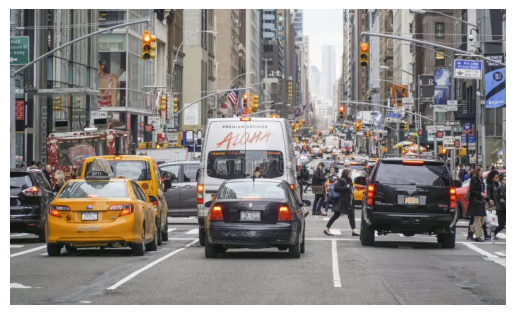

In [9]:
test_image = Image.open('street-traffic-new-york-typical-street-view-manhattan-manhattan-new-york-april-92272598.webp')
plt.imshow(test_image)
plt.axis('off')
plt.show()


image 1/1 D:\ery\School\Jupyter Notebooks\street-traffic-new-york-typical-street-view-manhattan-manhattan-new-york-april-92272598.webp: 640x640 14 cars, 14 persons, 2 trucks, 83.5ms
Speed: 4.3ms preprocess, 83.5ms inference, 117.8ms postprocess per image at shape (1, 3, 640, 640)


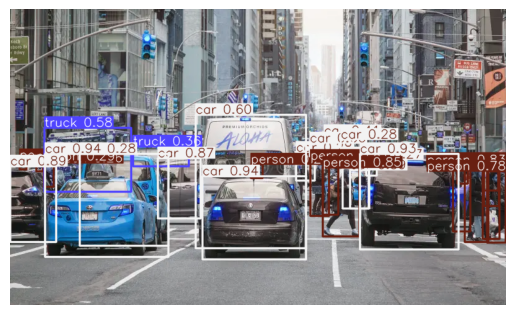

In [6]:
predrtdetr_test = rtdetr_model('street-traffic-new-york-typical-street-view-manhattan-manhattan-new-york-april-92272598.webp')
plt.imshow(predrtdetr_test[0].plot())
plt.axis('off')
plt.show()

In [10]:
rtdetr_model.export(format='onnx')

Ultralytics 8.3.107  Python-3.10.13 torch-2.5.1 CPU (AMD Ryzen 5 2600 Six-Core Processor)
rt-detr-l summary: 302 layers, 31,998,125 parameters, 0 gradients, 103.5 GFLOPs

PyTorch: starting from 'runs\detect\train25\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 300, 11) (63.1 MB)

ONNX: starting export with onnx 1.12.0 opset 19...
ONNX: slimming with onnxslim 0.1.50...
ONNX: simplifier failure: FLOAT8E4M3FN
ONNX: export success  8.0s, saved as 'runs\detect\train25\weights\best.onnx' (122.5 MB)

Export complete (11.9s)
Results saved to D:\ery\School\Jupyter Notebooks\runs\detect\train25\weights
Predict:         yolo predict task=detect model=runs\detect\train25\weights\best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs\detect\train25\weights\best.onnx imgsz=640 data=bdd100k--1/data.yaml  
Visualize:       https://netron.app


'runs\\detect\\train25\\weights\\best.onnx'

In [6]:
torch.cuda.empty_cache()

### DINOv2

In [44]:
dinov2_vits14_model = torch.hub.load("facebookresearch/dinov2", "dinov2_vits14")
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")
dinov2_vits14_model.to(device)

Using cache found in C:\Users\Ery/.cache\torch\hub\facebookresearch_dinov2_main


DinoVisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 384, kernel_size=(14, 14), stride=(14, 14))
    (norm): Identity()
  )
  (blocks): ModuleList(
    (0-11): 12 x NestedTensorBlock(
      (norm1): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (attn): MemEffAttention(
        (qkv): Linear(in_features=384, out_features=1152, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=384, out_features=384, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): LayerScale()
      (drop_path1): Identity()
      (norm2): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=384, out_features=1536, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=1536, out_features=384, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
      (ls2): LayerScale()
      (drop_path2): Identity()
    )
  )
  (n

In [46]:
transform = T.Compose([T.ToTensor(),T.Resize(244), T.CenterCrop(224), T.Normalize([0.5],[0.5])])

In [49]:
def load_image(img: str) -> torch.Tensor:
    img = Image.open(img)
    transformed_img = transform(img)[:3].unsqueeze(0)
    return transformed image

def embeddings(files: list) -> dict:
    all_embeddings = {}

    with torch.no_grad():
        for i, ile in enumerate(tqdm(files)):
            embeddings = dinov2_vits14_model(load_imge(file).to(device))

            all_embeddings[file] = np.array(embeddings[0].cpu().numpy()).reshape(1,-1).tolist()

    with open('all_embeddings.json', 'w') as f:
        f.write(json.dumps(all_embeddings))

    return all_embeddings

SyntaxError: invalid syntax (3594321963.py, line 4)